In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import random
import numpy as np

In [2]:
def mode_ties(s):
    m = s.mode()
    if len(m) > 1:
        random.shuffle(m)
        return(m[0])
    return m

def get_mv(task):
    df_answer = pd.read_csv('../../data/same-index-separate/answer_' + task + '.csv')
    df_truth = pd.read_csv('../../data/same-index-separate/truth_' + task + '.csv')
    df_truth = df_truth.set_index('question')
    trials = []
    for i in range(50):
        df_answer_grouped = df_answer[['question', 'answer']].groupby('question').agg(mode_ties)
        df_full = df_answer_grouped.join(df_truth, on='question', how='inner')
        mae = metrics.mean_absolute_error(df_full['answer'], df_full['truth'])
        trials.append(mae)
    return(np.mean(trials))

In [3]:
get_mv('weather_ordinal')

0.08662650602409638

           select     merge  merge & round
method                                    
BAU      0.121987  0.147410       0.099397
MAS      0.108935  0.123874       0.095380
SAD      0.082831  0.129200       0.084337
UNIFORM       NaN  0.164147       0.088855
           select     merge  merge & round
method                                    
BAU      0.295597  0.335841       0.267296
MAS      0.268344  0.288807       0.283019
SAD      0.298742  0.314289       0.295597
UNIFORM       NaN  0.353305       0.283019
            select      merge  merge & round
method                                      
BAU      16.050000  11.864562      11.860000
MAS      15.469286  14.150990      14.707143
SAD      13.712857  12.173791      12.187143
UNIFORM        NaN  12.022000      12.001429


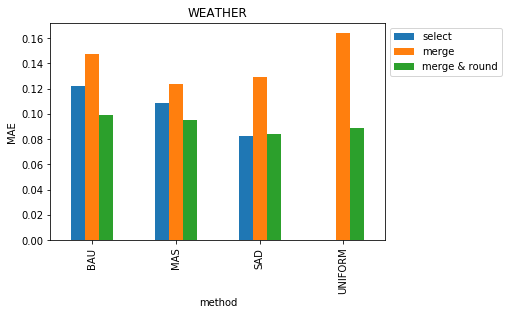

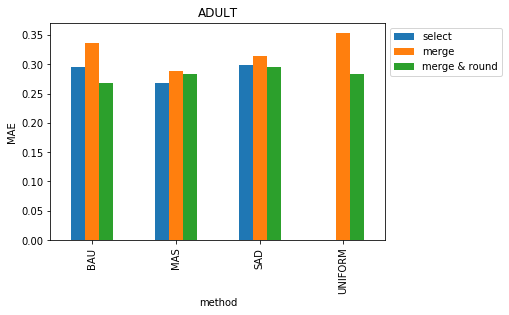

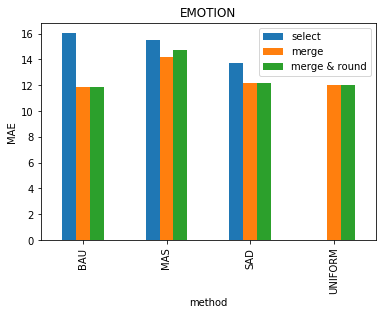

In [11]:
tasks = ['weather_ordinal','adult_ordinal', 'emotion']
show_mv = False
for task in tasks:
    df = pd.read_csv(task + '_merge_rounding.csv')
    df = df[['method', 'mae', 'rounding']]
    df['merge'] = df['method'].map(lambda x: "MERGE" in x)
    df['method'] = df['method'].map(lambda x: x.split('_')[0])
    df = df[df['method'].map(lambda x: "ORACLE" not in x and "RANDOM" not in x and "DEM" not in x)]
#     df = df[df['method'].map(lambda x: "DEM" not in x)]

    df_no_merge = df[df['merge'] == False]
    df_no_merge = df_no_merge[['method', 'mae']].groupby('method').mean()
    df_no_merge.columns = ['select']

    df_merge = df[(df['merge'] == True) & (df['rounding'] == False)]
    df_merge = df_merge[['method', 'mae']].groupby('method').mean()
    df_merge.columns = ['merge']


    df_merge_rounding = df[(df['merge'] == True) & (df['rounding'] == True)]
    df_merge_rounding = df_merge_rounding[['method', 'mae']].groupby('method').mean()
    df_merge_rounding.columns = ['merge & round']
    
    df_combined = df_no_merge.join(df_merge, how='outer')
    df_combined = df_combined.join(df_merge_rounding, how='outer')
    
    print(df_combined)
    df_mv = pd.DataFrame(index=df_merge.index)
    if "ordinal" in task and show_mv:
        df_mv['mv'] = get_mv(task)
        ax = df_mv.plot(kind='line', color='red')
    
        df_combined.plot.bar(ax=ax)
        ax.set_ylabel('MAE')
        ax.set_title(task.split("_")[0].upper())
        ax.get_legend().set_bbox_to_anchor((1, 1))
    else:
        ax = df_combined.plot.bar()
        ax.set_ylabel('MAE')
        ax.set_title(task.split("_")[0].upper())
        ax.get_legend().set_bbox_to_anchor((1, 1))
